In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df=pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In fraud detection case we always face imabalanced data problem where high amount of data belongs to the No-fraud (class=0)
and less amount of data belongs to fraud (class=1)

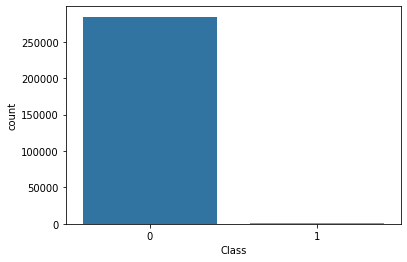

In [11]:
sns.countplot(df['Class'])

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Amount, dtype: object

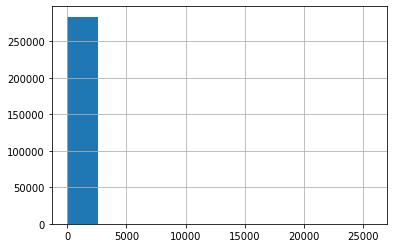

In [19]:
df.groupby('Class')['Amount'].hist()


In [20]:
X=df.drop('Class',axis=1)
y=df['Class']

In [22]:
from imblearn.over_sampling import RandomOverSampler
random=RandomOverSampler()
X_sample,y_sample=random.fit_sample(X,y)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.2)

In [28]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
train_acc=reg.score(X_train,y_train)
acc=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Taining Accuracy :',train_acc)
print('Testing Accuracy :',acc)
print('confusion_matrix :\n',matrix)
print('Classifiction_report :\n',report)

Taining Accuracy : 0.9377319170638201
Testing Accuracy : 0.9370944199215658
confusion_matrix :
 [[54900  2070]
 [ 5084 51672]]
Classifiction_report :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     56970
           1       0.96      0.91      0.94     56756

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



In [29]:
random=RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)
train_acc=random.score(X_train,y_train)
acc=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Taining Accuracy :',train_acc)
print('Testing Accuracy :',acc)
print('confusion_matrix :\n',matrix)
print('Classifiction_report :\n',report)

Taining Accuracy : 1.0
Testing Accuracy : 0.9999472416158135
confusion_matrix :
 [[56964     6]
 [    0 56756]]
Classifiction_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56970
           1       1.00      1.00      1.00     56756

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [33]:
import pickle
file='random_forest_fraud_detection.pkl'

pickle.dump(random,open(file,'wb'))
